In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('C:/Users/Axel/Desktop/tipos de proyectos data science/Proyectos amateur listos/Paneles solares/dataset_paneles.csv')

In [59]:
df.head()

,Panel_ID,Ubicacion,Latitud,Longitud,Grado_inclinacion,Temperatura_C,Humedad (%),Viento (m/s),Nubosidad (%),Eficiencia_inicial (%),...,Periodo Retorno (años),Co2_evitado (kg),Impacto_ambiental_total,Anomalia,Precio_mercado (USD/KWh),Ingresos_mercado (USD),Balance_energetico (KWh),Produccion_energia_scaled,Ingresos esperados ajustados,Carga_Red (%)
Fecha_medicion,,,,,,,,,,,,,,,,,,,,,
2024-01-01,92516,Chicureo,-33.539431,-70.833213,36,34.04,65.70,8.259354,95.99,86.87,...,0.070620,1701.5,1701.5,1,0.12,408.36,504.90,-1.277542,21030.54,85.163091
2024-01-02,60162,Lampa,-33.290758,-70.960223,27,31.13,58.11,4.738538,63.52,90.80,...,0.064418,1660.0,1660.0,1,0.12,398.40,786.06,-1.373574,30776.40,76.323494
2024-01-03,53225,Lampa,-33.268942,-70.581314,38,19.58,68.56,1.828476,89.17,93.20,...,0.059686,1844.5,1844.5,1,0.12,442.68,627.13,-0.946633,26597.69,83.000000
2024-01-04,84395,Lampa,-33.605816,-70.650460,34,22.75,67.57,4.008743,19.55,80.04,...,0.043890,1893.0,1893.0,1,0.12,454.32,768.20,-0.834402,38995.80,79.709456
2024-01-05,60188,Lampa,-33.221680,-70.931255,35,31.95,38.48,5.084928,36.99,87.87,...,0.046400,2617.0,2617.0,1,0.12,628.08,607.53,0.840966,37737.14,88.392625


In [8]:
# lista de columnas con porcentajes a redondear
Columnas_porcentajes = ["Humedad (%)", "Nubosidad (%)", "Eficiencia_inicial (%)","Eficiencia_actual (%)", "Temperatura_C"]
df[Columnas_porcentajes] = df[Columnas_porcentajes].round(2)
df.to_csv('C:/Users/Axel/Desktop/tipos de proyectos data science/Proyectos amateur listos/Paneles solares/dataset_paneles.csv', index=False)

In [10]:
np.random.seed(42)  # Para reproducibilidad
df["Costo_mantenimiento (CLP)"] = df["Panel_ID"].apply(lambda x: np.random.randint(150000, 500001))

In [27]:
df["Produccion_energia (kWh)"] = df["Produccion_energia (kWh)"].round(0)

In [12]:
df['Cantidad_paneles'] = df.groupby(['Latitud', 'Longitud']).ngroup()

df['Cantidad_paneles'] = df.groupby(['Latitud', 'Longitud'])['Cantidad_paneles'].transform(
    lambda x: np.random.randint(5, 11, size=x.shape[0])
)

print(df[['Latitud', 'Longitud', 'Cantidad_paneles']].head(10))

     Latitud   Longitud  Cantidad_paneles
0 -33.539431 -70.833213                 6
1 -33.290758 -70.960223                 9
2 -33.268942 -70.581314                 7
3 -33.605816 -70.650460                10
4 -33.221680 -70.931255                 7
5 -33.613635 -70.654688                10
6 -33.226697 -70.502395                10
7 -33.313769 -70.789887                 9
8 -33.571340 -70.712008                 9
9 -33.429131 -70.746767                 7


In [29]:
mapeo_paneles = df.groupby(['Latitud', 'Longitud'])['Cantidad_paneles'].sum().reset_index(name='Total_Paneles')

# Mostrar el mapeo de cuántos paneles fueron instalados en cada ubicación
print(mapeo_paneles)

        Latitud   Longitud  Total_Paneles
0    -33.699359 -70.878106              5
1    -33.699283 -70.865291              7
2    -33.698793 -70.930425              7
3    -33.698775 -70.967339              8
4    -33.698165 -70.962938              9
...         ...        ...            ...
1495 -33.200700 -70.925178              6
1496 -33.200411 -70.828817              7
1497 -33.200180 -70.595667              9
1498 -33.200113 -70.592466              7
1499 -33.200089 -70.601408              7

[1500 rows x 3 columns]


In [13]:
# Guardar el DataFrame en un nuevo archivo CSV
df.to_csv('C:/Users/Axel/Desktop/tipos de proyectos data science/Proyectos amateur listos/Paneles solares/dataset_paneles.csv', index=False)

In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Panel_ID                   1500 non-null   int64  
 1   Ubicacion                  1500 non-null   object 
 2   Latitud                    1500 non-null   float64
 3   Longitud                   1500 non-null   float64
 4   Grado_inclinacion          1500 non-null   int64  
 5   Temperatura_C              1500 non-null   float64
 6   Humedad (%)                1500 non-null   float64
 7   Viento (m/s)               1500 non-null   float64
 8   Nubosidad (%)              1500 non-null   float64
 9   Eficiencia_inicial (%)     1500 non-null   float64
 10  Eficiencia_actual (%)      1500 non-null   float64
 11  Fecha_medicion             1500 non-null   object 
 12  Costo_instalacion (CLP)    1500 non-null   int64  
 13  Costo_instalacion (USD)    1500 non-null   float

None

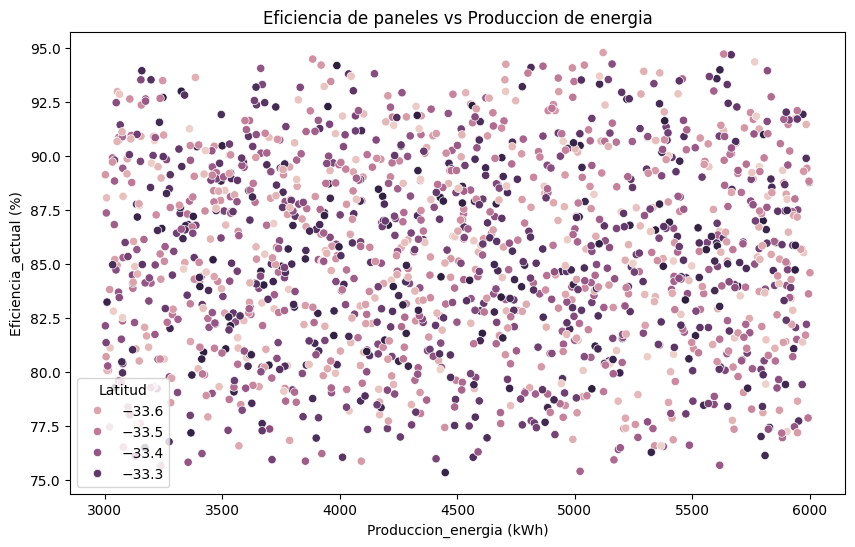

In [15]:
# Analisis de rendimiento de paneles solares
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Produccion_energia (kWh)'], y=df['Eficiencia_actual (%)'], hue=df['Latitud'])
plt.title("Eficiencia de paneles vs Produccion de energia")
plt.show()

In [37]:
# modelos predictivos para la degradacion de paneles 
X = df[['Vida_util (años)', 'Temperatura_C', 'Humedad (%)', 'Grado_inclinacion', 'Nubosidad (%)']]
y = df['Eficiencia_actual (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("MAE (XGBoost):", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score (XGBoost):", r2_score(y_test, y_pred_xgb))

MAE (XGBoost): 4.226375539143881
R2 Score (XGBoost): -0.2663838959315328


In [38]:
scaler = StandardScaler()
df['Produccion_energia_scaled'] = scaler.fit_transform(df[['Produccion_energia (kWh)']])

In [40]:
modelo_arima_corto = ARIMA(df['Produccion_energia_scaled'], order=(5,1,0))
modelo_arima_corto_fit = modelo_arima_corto.fit()
predicciones_corto = modelo_arima_corto_fit.forecast(steps=30) # 30 días
predicciones_corto = np.array(predicciones_corto).reshape(-1, 1)
predicciones_corto = scaler.inverse_transform(predicciones_corto)
print("redicciones a corto plazo:")
print(predicciones_corto)

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


redicciones a corto plazo:
[[4452.09756117]
 [4585.89847166]
 [4424.96095041]
 [4367.58246512]
 [4449.47426775]
 [4577.8407384 ]
 [4475.72850854]
 [4485.19572477]
 [4467.86568345]
 [4472.31467299]
 [4483.59315156]
 [4493.04520961]
 [4480.10817117]
 [4481.21441084]
 [4480.02391609]
 [4481.62253197]
 [4482.73385909]
 [4483.14025405]
 [4481.59501894]
 [4481.82722783]
 [4481.82519314]
 [4482.08515777]
 [4482.14762423]
 [4482.12005198]
 [4481.95256797]
 [4482.00218975]
 [4482.01702942]
 [4482.04781581]
 [4482.04382718]
 [4482.03425141]]


In [17]:
# Pronostico de generacion de energia
X = df[['Temperatura_C', 'Humedad (%)', 'Nubosidad (%)']]
y = df['Produccion_energia (kWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_pred = LinearRegression()
modelo_pred.fit(X_train, y_train)
y_pred = modelo_pred.predict(X_test)
print("R2 Score Prediccion energia: ", r2_score(y_test, y_pred))


R2 Score Prediccion energia:  -0.006781699403528796


In [41]:
modelo_arima_largo = ARIMA(df['Produccion_energia_scaled'], order=(10,2,5))
modelo_arima_largo_fit = modelo_arima_largo.fit()
predicciones_largo = modelo_arima_largo_fit.forecast(steps=365) # 1 año
predicciones_largo = np.array(predicciones_largo).reshape(-1, 1)
predicciones_largo = scaler.inverse_transform(predicciones_largo)
print("Predicciones a largo plazo:")
print(predicciones_largo)

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Axel\AppData\Local\Program

Predicciones a largo plazo:
[[4723.14499673]
 [4697.90722751]
 [4538.66125382]
 [4535.9517315 ]
 [4569.35817477]
 [4386.54779655]
 [4697.42918435]
 [4433.91880873]
 [4820.69017546]
 [4517.61837416]
 [4549.20837975]
 [4446.94890256]
 [4687.73356423]
 [4629.75254611]
 [4479.0183415 ]
 [4555.77139216]
 [4626.96786122]
 [4677.84719233]
 [4438.3927392 ]
 [4568.63692051]
 [4610.5627961 ]
 [4682.71482861]
 [4477.79718284]
 [4534.83678125]
 [4636.12892881]
 [4647.06616365]
 [4529.21728508]
 [4496.63319684]
 [4655.94940329]
 [4633.09932495]
 [4555.16852088]
 [4489.40041733]
 [4644.070767  ]
 [4644.75465625]
 [4556.3142779 ]
 [4503.76883264]
 [4619.22951637]
 [4663.30192563]
 [4554.19116446]
 [4517.36343371]
 [4600.4422971 ]
 [4671.56993472]
 [4562.60137248]
 [4520.65552797]
 [4593.81451496]
 [4667.89928016]
 [4579.41353013]
 [4518.15216001]
 [4592.45718076]
 [4660.82110237]
 [4595.71813513]
 [4518.38521461]
 [4588.7120738 ]
 [4656.86691784]
 [4606.57225165]
 [4524.30431801]
 [4581.28345257]
 [4

In [43]:

# Crea un DataFrame para las predicciones a corto plazo
df_corto = pd.DataFrame(predicciones_corto, columns=['Predicciones_Corto_Plazo'])

# Crea un DataFrame para las predicciones a largo plazo
df_largo = pd.DataFrame(predicciones_largo, columns=['Predicciones_Largo_Plazo'])

# Combina ambos DataFrames en uno solo
df_resultados = pd.concat([df_corto, df_largo], axis=1)

# Guarda el DataFrame en un archivo Excel
df_resultados.to_excel('predicciones_energia.xlsx', index=False)

print("Las predicciones han sido guardadas en 'predicciones_energia.xlsx'.")

Las predicciones han sido guardadas en 'predicciones_energia.xlsx'.


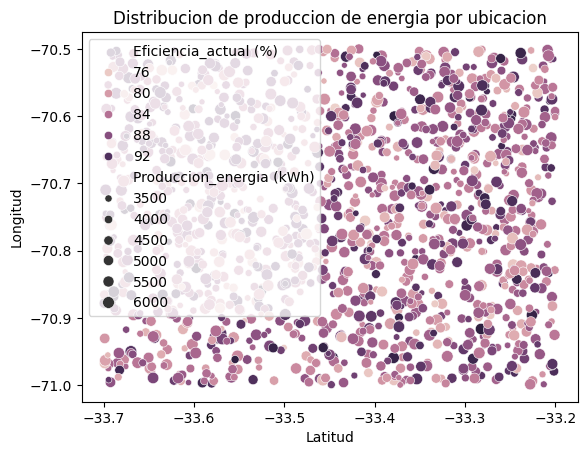

In [45]:
# Optimizacion de ubicacion de instalaciones solares
sns.scatterplot(x=df['Latitud'], y=df['Longitud'], size=df['Produccion_energia (kWh)'], hue=df['Eficiencia_actual (%)'])
plt.title("Distribucion de produccion de energia por ubicacion")
plt.show()

In [56]:
# Analisis de redes inteligentes (Smart grids)
df['Carga_Red (%)'] = (df['Consumo Red (KWh)'] / df['Produccion_energia (kWh)']) * 100
print("12.1 Uso de energía en Smart Grids:")
display(df[['Ubicacion', 'Produccion_energia (kWh)', 'Consumo Red (KWh)', 'Carga_Red (%)']].head())

12.1 Uso de energía en Smart Grids:


,Ubicacion,Produccion_energia (kWh),Consumo Red (KWh),Carga_Red (%)
Fecha_medicion,,,,
2024-01-01,Chicureo,3403.0,2898.10,85.163091
2024-01-02,Lampa,3320.0,2533.94,76.323494
2024-01-03,Lampa,3689.0,3061.87,83.000000
2024-01-04,Lampa,3786.0,3017.80,79.709456
2024-01-05,Lampa,5234.0,4626.47,88.392625


In [57]:
# Analisis de rentabilidad 
inflacion_anual = 0.03
df['Ingresos esperados (USD)'] = df['Produccion_energia (kWh)'] * df['Cantidad_paneles']
df['Ingresos esperados ajustados'] = df['Ingresos esperados (USD)'] * (1 + inflacion_anual)
df['ROI'] = df['Ingresos esperados ajustados'] / df['Costo_instalacion (USD)']
print("Promedio ROI por ubicación:")
print(df.groupby(['Latitud', 'Longitud'])['ROI'].mean())

Promedio ROI por ubicación:
Latitud     Longitud  
-33.699359  -70.878106    12.989382
-33.699283  -70.865291    16.558190
-33.698793  -70.930425    25.733731
-33.698775  -70.967339    24.689587
-33.698165  -70.962938    27.835911
                            ...    
-33.200700  -70.925178    22.624737
-33.200411  -70.828817    14.047243
-33.200180  -70.595667    26.239297
-33.200113  -70.592466    26.135135
-33.200089  -70.601408    14.954265
Name: ROI, Length: 1500, dtype: float64


9.1 Resumen de Costo-Beneficio:


,Latitud,Longitud,Costo Total (USD),Beneficio neto (USD),Periodo Retorno (años)
Fecha_medicion,,,,,
2024-01-01,-33.539431,-70.833213,1485.172222,19545.367778,0.070620
2024-01-02,-33.290758,-70.960223,1982.561111,28793.838889,0.064418
2024-01-03,-33.268942,-70.581314,1587.508889,25010.181111,0.059686
2024-01-04,-33.605816,-70.650460,1711.508889,37284.291111,0.043890
2024-01-05,-33.221680,-70.931255,1751.003333,35986.136667,0.046400


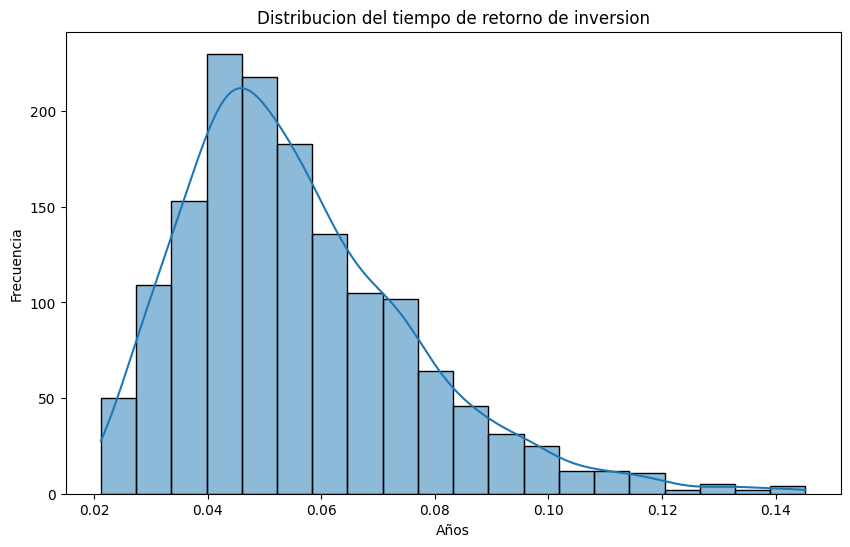

In [47]:
subsidios = 0.15  # 15% de subsidio

df['Costo Total (USD)'] = df['Costo_instalacion (USD)'] + df['Costo_mantenimiento (USD)']
df['Beneficio neto (USD)'] = df['Ingresos esperados ajustados'] - df['Costo Total (USD)']
df['Periodo Retorno (años)'] = df['Costo Total (USD)'] / df['Ingresos esperados ajustados']

print("9.1 Resumen de Costo-Beneficio:")
display(df[['Latitud', 'Longitud', 'Costo Total (USD)', 'Beneficio neto (USD)', 'Periodo Retorno (años)']].head())


plt.figure(figsize=(10,6))
sns.histplot(df['Periodo Retorno (años)'], bins=20, kde=True)
plt.title("Distribucion del tiempo de retorno de inversion")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.show()

In [48]:
# Guardar Análisis de Costo-Beneficio en un archivo Excel
costo_beneficio_df = df[['Latitud', 'Longitud', 'Costo Total (USD)', 'Beneficio neto (USD)', 'Periodo Retorno (años)']]

# Guardar en un archivo Excel
costo_beneficio_df.to_excel("analisis_costo_beneficio.xlsx", sheet_name="Costo_Beneficio", index=False)

print("Análisis de Costo-Beneficio guardado en 'analisis_costo_beneficio.xlsx'")



Análisis de Costo-Beneficio guardado en 'analisis_costo_beneficio.xlsx'


In [ ]:
# Analisis de impacto ambiental
df['Co2_evitado (kg)'] = df['Produccion_energia (kWh)'] * 0.5  # Suposición de 0.5 kg CO2/kWh
df['Impacto_ambiental_total'] = df['Co2_evitado (kg)']
print("10.1 Reducción de CO2 total:", df['Co2_evitado (kg)'].sum())

10.1 Reducción de CO2 total: 3380372.5


In [27]:
# Evaluacion del ciclo de vida 
df['Impacto_ambiental_total'] = df['Co2_evitado (kg)'] / df['Vida_util (años)']
print("Impacto ambiental promedio por año:", df['Impacto_ambiental_total'].mean())

Impacto ambiental promedio por año: 185.75646777069653


In [50]:
# Deteccion de anomalias y mantenimiento predictivo
iso_forest = IsolationForest(contamination=0.05)
df['Anomalia'] = iso_forest.fit_predict(df[['Produccion_energia (kWh)', 'Eficiencia_actual (%)']])
print("11.1 Detección de anomalías:")
display(df[df['Anomalia'] == -1])

11.1 Detección de anomalías:


,Panel_ID,Ubicacion,Latitud,Longitud,Grado_inclinacion,Temperatura_C,Humedad (%),Viento (m/s),Nubosidad (%),Eficiencia_inicial (%),...,Beneficio neto (USD),Periodo Retorno (años),Co2_evitado (kg),Impacto_ambiental_total,Anomalia,Precio_mercado (USD/KWh),Ingresos_mercado (USD),Balance_energetico (KWh),Produccion_energia_scaled,Ingresos esperados ajustados
Fecha_medicion,,,,,,,,,,,,,,,,,,,,,
2024-02-06,42436,Batuco,-33.256605,-70.597436,34,23.94,57.15,7.335469,16.04,81.10,...,19961.332222,0.090187,1521.5,1521.5,-1,0.12,365.16,554.89,-1.694070,21940.03
2024-03-22,27316,Pirque,-33.281798,-70.851681,30,15.06,60.16,3.047169,3.27,80.49,...,47507.823333,0.031332,2976.0,2976.0,-1,0.12,714.24,621.76,1.671708,49044.48
2024-03-23,96451,Pirque,-33.484989,-70.817876,28,30.05,37.16,0.236013,23.01,80.13,...,47196.800000,0.044098,2996.0,2996.0,-1,0.12,719.04,622.88,1.717989,49374.08
2024-04-01,20748,Pirque,-33.553951,-70.599565,28,18.66,44.46,6.212769,33.12,94.54,...,34763.148889,0.043349,2520.0,2520.0,-1,0.12,604.80,659.47,0.616504,36338.40
2024-05-22,29834,Colina,-33.460713,-70.805521,30,31.80,45.20,8.030930,0.60,80.06,...,24382.643333,0.083528,2583.0,2583.0,-1,0.12,619.92,379.60,0.762289,26604.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027-11-02,88238,Colina,-33.247269,-70.781566,35,10.43,62.67,7.524537,10.57,80.13,...,46032.807778,0.035479,2896.0,2896.0,-1,0.12,695.04,616.00,1.486585,47726.08
2027-11-10,67950,Chicureo,-33.554443,-70.961733,26,28.43,57.28,1.262074,80.43,94.72,...,18461.562222,0.077042,1942.0,1942.0,-1,0.12,466.08,472.45,-0.721014,20002.60
2027-11-20,42991,Pirque,-33.674618,-70.629799,21,32.20,40.57,0.885315,24.36,94.17,...,23564.586667,0.066042,1531.0,1531.0,-1,0.12,367.44,742.88,-1.672086,25230.88


In [51]:
# Guardar detección de anomalías en Excel
df_anomalias = df[df['Anomalia'] == -1]
df_anomalias.to_excel("deteccion_anomalias.xlsx", index=False)
print("Detección de anomalías guardada en 'deteccion_anomalias.xlsx'")


Detección de anomalías guardada en 'deteccion_anomalias.xlsx'


In [52]:
# Integracion de energia en mercados energeticos
df['Precio_mercado (USD/KWh)'] = 0.12 #suposicion
df['Ingresos_mercado (USD)'] = df['Produccion_energia (kWh)'] * df['Precio_mercado (USD/KWh)']
print("Ingresos potenciales por venta de energia:", df['Ingresos_mercado (USD)'].sum())

Ingresos potenciales por venta de energia: 811289.3999999999


In [53]:
# balance de Energia
df['Balance_energetico (KWh)'] = df['Produccion_energia (kWh)'] - df['Consumo Red (KWh)']
print("Balance energetico promedio:", df['Balance_energetico (KWh)'].mean())

Balance energetico promedio: 642.4694666666667


In [54]:
# Analisis de precios de mercado 
print("Impacto de la generacion solar en el mercado energetico:")
display(df[['Produccion_energia (kWh)', 'Precio_mercado (USD/KWh)', 'Ingresos_mercado (USD)']].head())

Impacto de la generacion solar en el mercado energetico:


,Produccion_energia (kWh),Precio_mercado (USD/KWh),Ingresos_mercado (USD)
Fecha_medicion,,,
2024-01-01,3403.0,0.12,408.36
2024-01-02,3320.0,0.12,398.40
2024-01-03,3689.0,0.12,442.68
2024-01-04,3786.0,0.12,454.32
2024-01-05,5234.0,0.12,628.08


In [55]:
# Guardar análisis de precios de mercado en Excel
df_precios_mercado = df[['Produccion_energia (kWh)', 'Precio_mercado (USD/KWh)', 'Ingresos_mercado (USD)']]
df_precios_mercado.to_excel("analisis_precios_mercado.xlsx", index=False)
print("Análisis de precios de mercado guardado en 'analisis_precios_mercado.xlsx'")


Análisis de precios de mercado guardado en 'analisis_precios_mercado.xlsx'


In [58]:
df.columns

Index(['Panel_ID', 'Ubicacion', 'Latitud', 'Longitud', 'Grado_inclinacion',
       'Temperatura_C', 'Humedad (%)', 'Viento (m/s)', 'Nubosidad (%)',
       'Eficiencia_inicial (%)', 'Eficiencia_actual (%)',
       'Costo_instalacion (CLP)', 'Costo_instalacion (USD)',
       'Costo_mantenimiento (CLP)', 'Costo_mantenimiento (USD)',
       'Produccion_energia (kWh)', 'Vida_util (años)',
       'Incentivos_fiscales (CLP)', 'Incentivos_fiscales (USD)',
       'Cantidad_paneles', 'Consumo Red (KWh)', 'Ingresos esperados (USD)',
       'ROI', 'Costo Total (USD)', 'Beneficio neto (USD)',
       'Periodo Retorno (años)', 'Co2_evitado (kg)', 'Impacto_ambiental_total',
       'Anomalia', 'Precio_mercado (USD/KWh)', 'Ingresos_mercado (USD)',
       'Balance_energetico (KWh)', 'Produccion_energia_scaled',
       'Ingresos esperados ajustados', 'Carga_Red (%)'],
      dtype='object')

In [60]:
df.to_excel("analisis_paneles_solares.xlsx", index=False)

In [2]:
df1 = pd.read_excel('C:/Users/Axel/Desktop/tipos de proyectos data science/Proyectos amateur listos/Paneles solares/analisis_paneles_solares.xlsx')

In [3]:
df1.head()

,Ubicacion,Latitud,Longitud,Grado_inclinacion,Temperatura_C,Humedad (%),Viento (m/s),Nubosidad (%),Eficiencia_inicial (%),Eficiencia_actual (%),...,Periodo Retorno (años),Co2_evitado (kg),Impacto_ambiental_total,Anomalia,Precio_mercado (USD/KWh),Ingresos_mercado (USD),Balance_energetico (KWh),Produccion_energia_scaled,Ingresos esperados ajustados,Carga_Red (%)
0,Chicureo,-33.539431,-70.833213,36,34.04,65.70,8.259354,95.99,86.87,84.15,...,0.070620,1701.5,1701.5,1,0.12,408.36,504.90,-1.277542,21030.54,85.163091
1,Lampa,-33.290758,-70.960223,27,31.13,58.11,4.738538,63.52,90.80,87.34,...,0.064418,1660.0,1660.0,1,0.12,398.40,786.06,-1.373574,30776.40,76.323494
2,Lampa,-33.268942,-70.581314,38,19.58,68.56,1.828476,89.17,93.20,89.59,...,0.059686,1844.5,1844.5,1,0.12,442.68,627.13,-0.946633,26597.69,83.000000
3,Lampa,-33.605816,-70.650460,34,22.75,67.57,4.008743,19.55,80.04,76.82,...,0.043890,1893.0,1893.0,1,0.12,454.32,768.20,-0.834402,38995.80,79.709456
4,Lampa,-33.221680,-70.931255,35,31.95,38.48,5.084928,36.99,87.87,86.79,...,0.046400,2617.0,2617.0,1,0.12,628.08,607.53,0.840966,37737.14,88.392625


In [4]:
df1.columns

Index(['Ubicacion', 'Latitud', 'Longitud', 'Grado_inclinacion',
       'Temperatura_C', 'Humedad (%)', 'Viento (m/s)', 'Nubosidad (%)',
       'Eficiencia_inicial (%)', 'Eficiencia_actual (%)',
       'Costo_instalacion (CLP)', 'Costo_instalacion (USD)',
       'Costo_mantenimiento (CLP)', 'Costo_mantenimiento (USD)',
       'Produccion_energia (kWh)', 'Vida_util (años)', 'Cantidad_paneles',
       'Consumo Red (KWh)', 'Ingresos esperados (USD)', 'ROI',
       'Costo Total (USD)', 'Beneficio neto (USD)', 'Periodo Retorno (años)',
       'Co2_evitado (kg)', 'Impacto_ambiental_total', 'Anomalia',
       'Precio_mercado (USD/KWh)', 'Ingresos_mercado (USD)',
       'Balance_energetico (KWh)', 'Produccion_energia_scaled',
       'Ingresos esperados ajustados', 'Carga_Red (%)'],
      dtype='object')

In [ ]:
# Se considera la eficiencia, temperatura y nubosidad para identificar ubicaciones óptimas
X = df1[['Latitud', 'Longitud', 'Eficiencia_actual (%)', 'Temperatura_C', 'Nubosidad (%)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Aplicar KMeans para encontrar clusters óptimos de ubicación
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df1['Cluster_Ubicacion'] = kmeans.fit_predict(X_scaled)
print(kmeans)

KMeans(n_clusters=3, n_init=10, random_state=42)


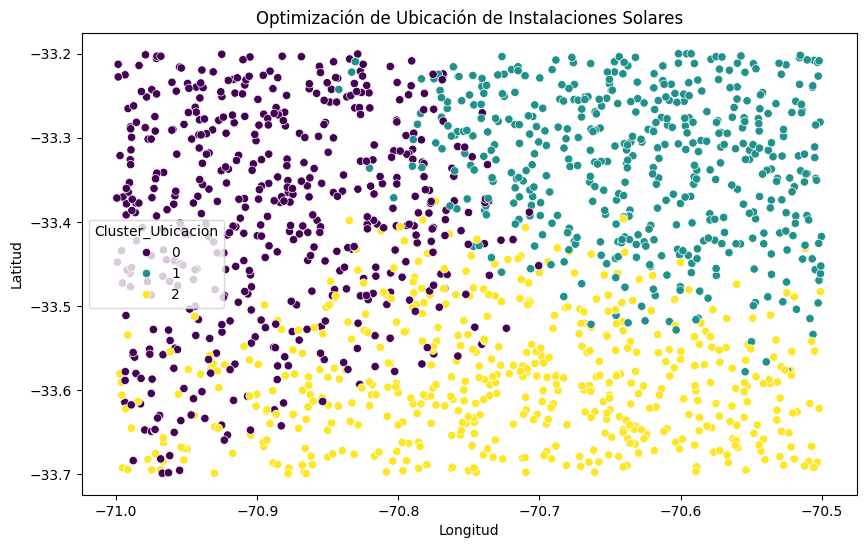

In [7]:
# Visualizar clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1['Longitud'], y=df1['Latitud'], hue=df1['Cluster_Ubicacion'], palette='viridis')
plt.title('Optimización de Ubicación de Instalaciones Solares')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

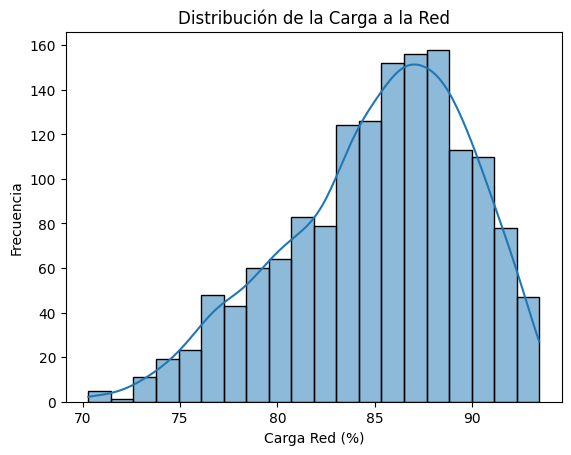

In [ ]:
# Identificar balance energético y carga a la red
sns.histplot(df1['Carga_Red (%)'], kde=True, bins=20)
plt.title('Distribución de la Carga a la Red')
plt.xlabel('Carga Red (%)')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
# Identificar ubicaciones con mayor eficiencia y menor carga a la red
optimal_solar_sites = df1[(df1['Eficiencia_actual (%)'] > df1['Eficiencia_actual (%)'].median()) & (df1['Carga_Red (%)'] < df1['Carga_Red (%)'].median())]
print("Ubicaciones óptimas para integración en la red:")
print(optimal_solar_sites[['Ubicacion', 'Eficiencia_actual (%)', 'Carga_Red (%)']])


Ubicaciones óptimas para integración en la red:
     Ubicacion  Eficiencia_actual (%)  Carga_Red (%)
1        Lampa                  87.34      76.323494
2        Lampa                  89.59      83.000000
8       Colina                  90.45      76.506494
11      Colina                  87.45      85.162878
14      Pirque                  86.89      81.844964
...        ...                    ...            ...
1477    Batuco                  92.57      79.632563
1484    Batuco                  89.56      85.873817
1489    Colina                  88.87      85.038721
1490    Batuco                  91.22      77.207662
1492  Chicureo                  90.99      77.527168

[415 rows x 3 columns]


In [ ]:
# Identificar paneles propensos a fallar con Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df1['Anomalia_Predictiva'] = iso_forest.fit_predict(df1[['Eficiencia_actual (%)', 'Produccion_energia (kWh)', 'Temperatura_C']])

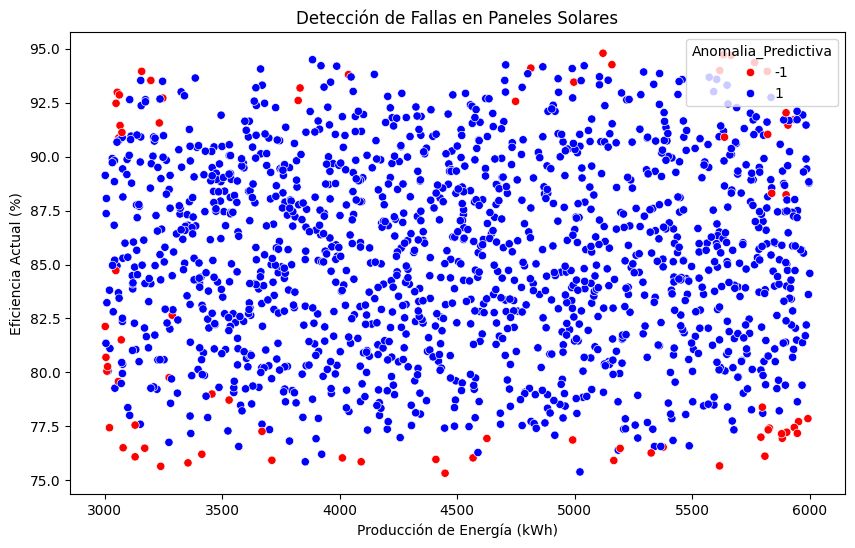

In [11]:
# Visualización de anomalías detectadas
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1['Produccion_energia (kWh)'], y=df1['Eficiencia_actual (%)'], hue=df1['Anomalia_Predictiva'], palette={1: 'blue', -1: 'red'})
plt.title('Detección de Fallas en Paneles Solares')
plt.xlabel('Producción de Energía (kWh)')
plt.ylabel('Eficiencia Actual (%)')
plt.show()

In [12]:
# Mostrar posibles paneles en riesgo
df_fallas = df1[df1['Anomalia_Predictiva'] == -1]
print("Paneles con posible falla detectada:")
print(df_fallas[['Ubicacion', 'Eficiencia_actual (%)', 'Produccion_energia (kWh)', 'Temperatura_C']])

Paneles con posible falla detectada:
     Ubicacion  Eficiencia_actual (%)  Produccion_energia (kWh)  Temperatura_C
27      Batuco                  93.80                      4037          33.59
81      Pirque                  77.72                      5952          15.06
82      Pirque                  77.86                      5992          30.05
95       Lampa                  82.65                      3287          10.23
105      Lampa                  79.76                      3274          10.16
...        ...                    ...                       ...            ...
1397    Batuco                  77.16                      5880          16.62
1401    Colina                  77.00                      5792          10.43
1404     Lampa                  80.27                      3012          13.25
1418    Colina                  93.18                      3831          10.88
1419    Pirque                  92.86                      3062          32.20

[75 rows x 4 c

In [13]:
df1.to_excel("analisis_paneles_solares.xlsx", index=False)

In [14]:
df1.columns

Index(['Ubicacion', 'Latitud', 'Longitud', 'Grado_inclinacion',
       'Temperatura_C', 'Humedad (%)', 'Viento (m/s)', 'Nubosidad (%)',
       'Eficiencia_inicial (%)', 'Eficiencia_actual (%)',
       'Costo_instalacion (CLP)', 'Costo_instalacion (USD)',
       'Costo_mantenimiento (CLP)', 'Costo_mantenimiento (USD)',
       'Produccion_energia (kWh)', 'Vida_util (años)', 'Cantidad_paneles',
       'Consumo Red (KWh)', 'Ingresos esperados (USD)', 'ROI',
       'Costo Total (USD)', 'Beneficio neto (USD)', 'Periodo Retorno (años)',
       'Co2_evitado (kg)', 'Impacto_ambiental_total', 'Anomalia',
       'Precio_mercado (USD/KWh)', 'Ingresos_mercado (USD)',
       'Balance_energetico (KWh)', 'Produccion_energia_scaled',
       'Ingresos esperados ajustados', 'Carga_Red (%)', 'Cluster_Ubicacion',
       'Anomalia_Predictiva'],
      dtype='object')